In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\ADMIN\Desktop\CODES\forbes_billionaires_geo.csv')
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321)
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286)
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969)
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548)
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293)


In [3]:
data.describe(include = 'all')

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
count,2755,2755.000000,2755,2755,2755.000000,2630.00000,2715,2739,2090,1552.000000,1409,2737,2755
unique,2752,NaN,70,924,NaN,NaN,768,70,8,NaN,1120,2,754
top,Li Li,NaN,United States,real estate,NaN,NaN,"Beijing, China",United States,Married,NaN,"Diploma, High School",True,POINT (116.3912757 39.906217)
freq,2,NaN,724,171,NaN,NaN,98,718,1734,NaN,23,1960,98
mean,NaN,4.749220,NaN,NaN,1345.663521,63.26730,NaN,NaN,NaN,2.978093,NaN,NaN,NaN
std,NaN,9.615358,NaN,NaN,772.669811,13.47916,NaN,NaN,NaN,1.618569,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,1.000000,18.00000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,1.500000,NaN,NaN,680.000000,54.00000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,1362.000000,63.00000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,NaN,4.200000,NaN,NaN,2035.000000,73.00000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2755 non-null   object 
 1   NetWorth     2755 non-null   float64
 2   Country      2755 non-null   object 
 3   Source       2755 non-null   object 
 4   Rank         2755 non-null   int64  
 5   Age          2630 non-null   float64
 6   Residence    2715 non-null   object 
 7   Citizenship  2739 non-null   object 
 8   Status       2090 non-null   object 
 9   Children     1552 non-null   float64
 10  Education    1409 non-null   object 
 11  Self_made    2737 non-null   object 
 12  geometry     2755 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 279.9+ KB


In [5]:
data.drop(['Status', 'Children', 'Education', 'Self_made', 'Residence', 'Citizenship'], axis = 1, inplace = True)

In [6]:
data.head(3)

,Name,NetWorth,Country,Source,Rank,Age,geometry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,POINT (-122.3300624 47.6038321)
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,POINT (-97.74369950000001 30.2711286)
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,POINT (2.3514616 48.8566969)


In [7]:
data['Country'].value_counts()

United States           724
China                   626
India                   140
Germany                 136
Russia                  118
                       ... 
Oman                      1
Macao                     1
Eswatini (Swaziland)      1
Venezuela                 1
Nepal                     1
Name: Country, Length: 70, dtype: int64

In [8]:
country_grp=data.groupby(by='Country').agg({'Name':'count','NetWorth':'sum'})
country_grp.rename({'Name':'CountofName','NetWorth':'SumofNetworth'},axis=1,inplace=True)
country_grp['%Count_of_Name'] = round((country_grp['CountofName']/sum(country_grp['CountofName']))*100, 2)
country_grp.sort_values('SumofNetworth', ascending = False, inplace = True)
country_grp[:20]

,CountofName,SumofNetworth,%Count_of_Name
Country,,,
United States,724,4398.4,26.28
China,626,2531.9,22.72
Germany,136,625.5,4.94
India,140,596.4,5.08
Russia,118,586.0,4.28
France,42,512.2,1.52
Hong Kong,71,448.2,2.58
Canada,64,231.1,2.32
Japan,49,225.4,1.78


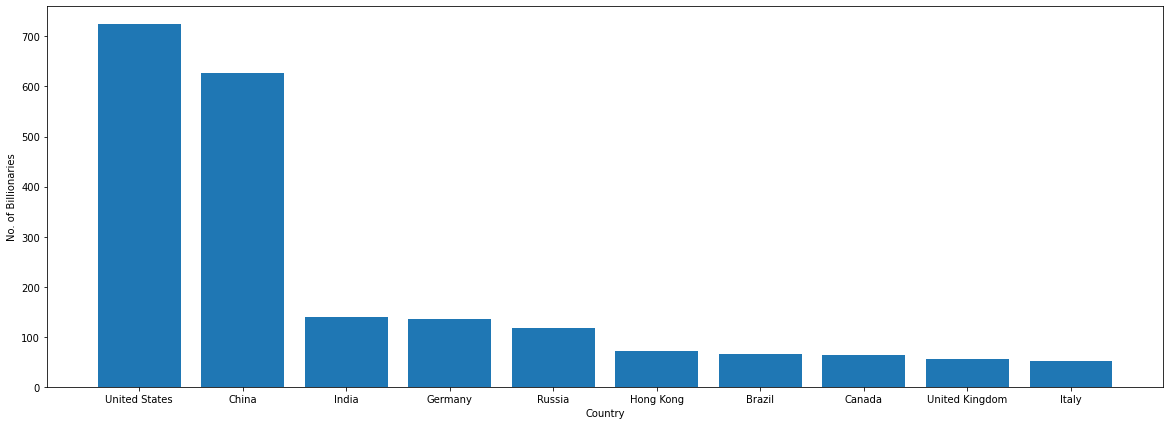

In [9]:
plt.figure(figsize = (20, 7))
plt.bar(list(data['Country'].value_counts()[:10].keys()), (list(data['Country'].value_counts()[:10])))
plt.xlabel('Country')
plt.ylabel('No. of Billionaries')
plt.show()

In [10]:
source_grp = data.groupby('Source').agg({'Source' : 'count', 'NetWorth':'sum'})
source_grp

,Source,NetWorth
Source,,
3D printing,1,2.5
AOL,1,1.5
Airbnb,3,38.5
Airline,1,1.2
"Aldi, Trader Joe's",1,18.8
...,...,...
wine,3,6.3
winter jackets,1,3.4
"wire & cables, paints",1,1.7


In [11]:
source_grp = data.groupby('Source').agg({'Source' : 'count', 'NetWorth':'sum'})
source_grp.sort_values('NetWorth', ascending = False, inplace = True)
source_grp[:20]

,Source,NetWorth
Source,,
real estate,171,686.1
diversified,85,378.2
investments,90,339.2
pharmaceuticals,99,335.3
software,62,275.8
hedge funds,42,240.1
Amazon,2,230.0
e-commerce,24,225.5
Walmart,7,220.2


In [12]:
data['Age'].min()

18.0

In [13]:
data['Age_Group'] = np.where((data['Age'] >= 18) & (data['Age'] <= 28), '18 - 28 years',
                            np.where((data['Age'] > 28) & (data['Age'] <= 38), '28 - 38 years',
                                    np.where((data['Age'] > 38) & (data['Age'] <= 48), '38 - 48 years',
                                            np.where((data['Age'] > 48) & (data['Age'] <= 58), '48 - 58 years',
                                                    np.where((data['Age'] > 58) & (data['Age'] <= 68), '58 - 68 years',
                                                            np.where((data['Age'] > 68), '68+ years', 'NA'))))))
data['Age_Group'].value_counts()

68+ years        937
48 - 58 years    684
58 - 68 years    656
38 - 48 years    274
NA               125
28 - 38 years     71
18 - 28 years      8
Name: Age_Group, dtype: int64

In [14]:
data[data['Age_Group'] == 'NA']

,Name,NetWorth,Country,Source,Rank,Age,geometry,Age_Group
33,Beate Heister & Karl Albrecht Jr.,39.2,Germany,supermarkets,34,NaN,POINT (10.4234469 51.0834196),NA
109,Petr Kellner,17.5,Czechia,"finance, telecommunications",110,NaN,POINT (15.4749544 49.8167003),NA
130,Zhou Qunfei & family,15.4,Hong Kong,smartphone screens,131,NaN,POINT (114.1628131 22.2793278),NA
132,Hinduja brothers,14.9,United Kingdom,diversified,133,NaN,POINT (-0.1276474 51.5073219),NA
158,Robert & Philip Ng,13.3,Singapore,real estate,158,NaN,POINT (103.8194992 1.357107),NA
...,...,...,...,...,...,...,...,...
2706,Li Yinan,1.0,China,Investments,2674,NaN,POINT (114.0543297 22.555454),NA
2714,Michael McCain,1.0,Canada,packaged meats,2674,NaN,POINT (-107.991707 61.0666922),NA
2720,Maria Pinheiro,1.0,Brazil,supermarkets,2674,NaN,POINT (-46.037163 -7.53214),NA
2726,Scott Smith,1.0,United States,cloud computing,2674,NaN,POINT (-100.4458825 39.7837304),NA


In [15]:
Age = data.groupby('Age_Group').agg({'Age_Group' : 'count', 'NetWorth':'sum'})
Age.sort_values('NetWorth', ascending = False, inplace = True)
Age

,Age_Group,NetWorth
Age_Group,,
68+ years,937,4867.2
48 - 58 years,684,3215.1
58 - 68 years,656,2960.0
38 - 48 years,274,1159.1
NA,125,473.3
28 - 38 years,71,391.0
18 - 28 years,8,18.4


In [16]:
x = data.groupby(by='Age_Group').agg({'Name':'count','NetWorth':'sum'})

In [17]:
x.rename({'Name':'CountofName','NetWorth':'SumofNetworth'},axis=1,inplace=True)
x['%Count_of_NetWorth'] = round((x['CountofName']/sum(x['CountofName']))*100, 2)
x.sort_values('SumofNetworth', ascending = False, inplace = True)
x

,CountofName,SumofNetworth,%Count_of_NetWorth
Age_Group,,,
68+ years,937,4867.2,34.01
48 - 58 years,684,3215.1,24.83
58 - 68 years,656,2960.0,23.81
38 - 48 years,274,1159.1,9.95
NA,125,473.3,4.54
28 - 38 years,71,391.0,2.58
18 - 28 years,8,18.4,0.29


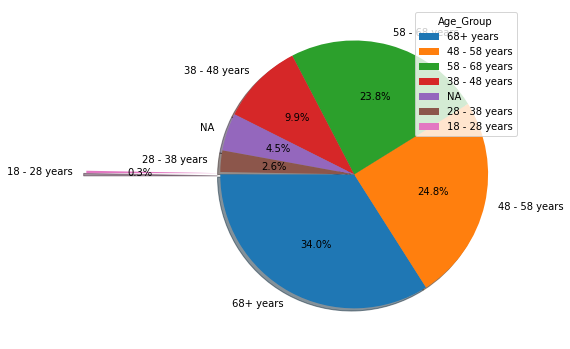

In [18]:
plt.figure(figsize = (6, 7))
plt.pie(data['Age_Group'].value_counts(), labels = data['Age_Group'].value_counts().keys(), autopct = '%0.1f%%', startangle = 180, shadow = True, explode = [0, 0, 0, 0, 0, 0, 1])
plt.legend(loc = 'upper right', title = 'Age_Group')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'